In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (12, 6)
sns.set()

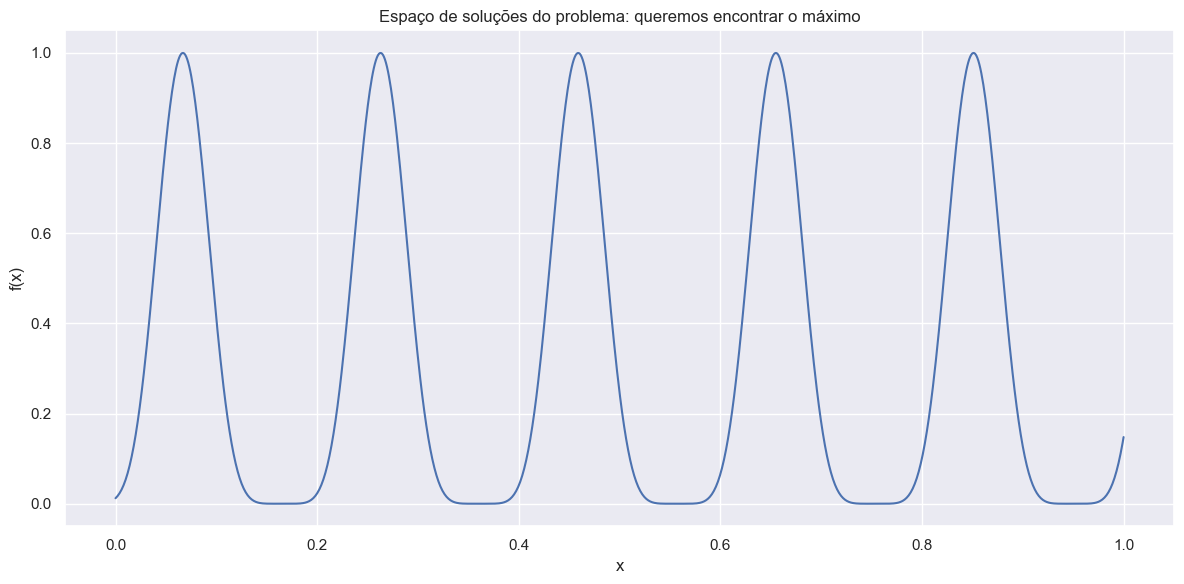

In [3]:
x = np.linspace(0, 1, 1000)
f = np.absolute(np.sin(5.1 * np.pi * x + 0.5)**6)

plt.title("Espaço de soluções do problema: queremos encontrar o máximo")
plt.plot(x, f)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tight_layout()
plt.show()

In [4]:
def init(size):
    pop = []
    
    for i in range(size):
        s = np.random.uniform(0, 1)
        pop.append(s)
    
    return pop

In [5]:
def fitness(pop):
    fit = []
    
    for x in pop:
        f = np.absolute(np.sin(5.1 * np.pi * x + 0.5)**6)
        fit.append(f)
    
    return fit

In [18]:
def shared_fitness(pop, fit, min_dist=0.1, alpha=0.9):
    shared_fit = []
    
    for f1 in fit:
        den = 1
        
        for f2 in fit:
            dist = np.absolute(f1 - f2)
            if dist < min_dist:
                den = den + (1 - (dist/min_dist)**alpha)
        
        shared = f1 / den
        shared_fit.append(shared)
    
    return shared_fit

In [7]:
def selection(pop, fit, num_parents):
    sorted_pop = [p for _, p in sorted(zip(fit, pop), reverse=True)]
    parents = sorted_pop[:num_parents]
    
    return parents

In [23]:
def mutation(sample, mutation_rate=0.10):
    mutants = []
    
    for s in sample:
        chance = np.random.uniform(0, 1)
        if chance <= mutation_rate:
            s = np.random.uniform(0, 1)
        mutants.append(s)
    
    return mutants

In [21]:
def genetic_algorithm(pop_size=50, num_generations=100, share_fitness=False):
    num_parents = pop_size // 2
    pop = init(pop_size)
    
    for i in range(num_generations):
        fit = fitness(pop)
        
        if share_fitness:
            fit = shared_fitness(pop, fit)
        
        parents = selection(pop, fit, num_parents)
        mutants = mutation(parents)
        
        pop = parents + mutants
    
    return pop

In [13]:
def show_results(title, share_fitness):
    pop = genetic_algorithm(pop_size=50, num_generations=100, share_fitness=share_fitness)

    x = np.linspace(0, 1, 1000)
    f = np.absolute(np.sin(5.1 * np.pi * x + 0.5)**6)

    x_pop = np.array(pop)
    y_pop = np.absolute(np.sin(5.1 * np.pi * x_pop + 0.5)**6)

    plt.plot(x, f, label="Espaço")
    plt.scatter(x_pop, y_pop, label="Soluções", color="black", marker="x")

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.tight_layout()
    plt.show()

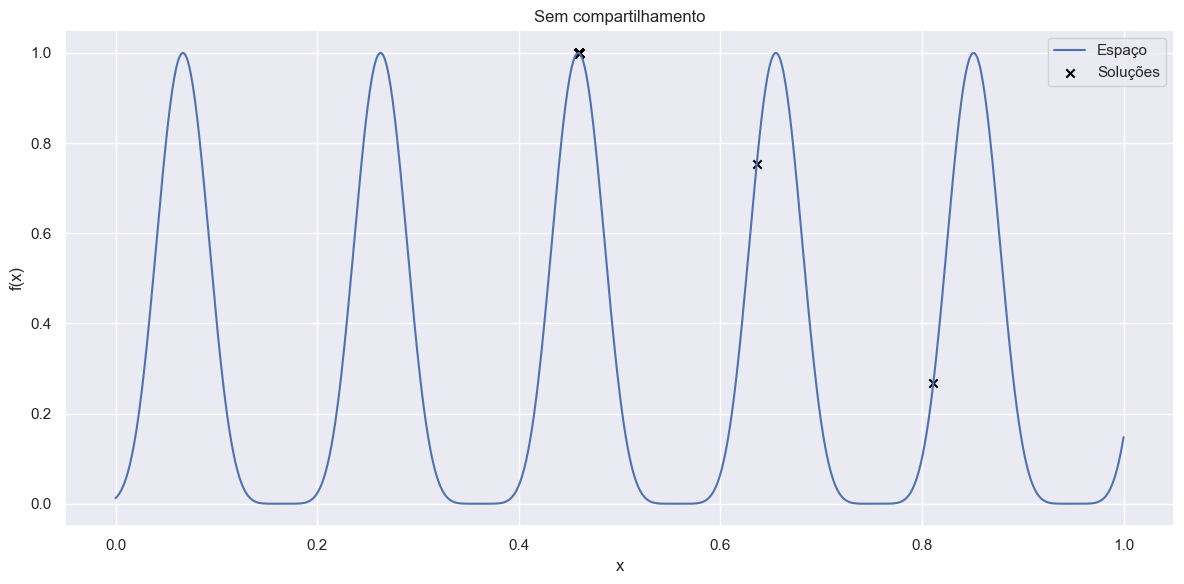

In [24]:
show_results("Sem compartilhamento", False)

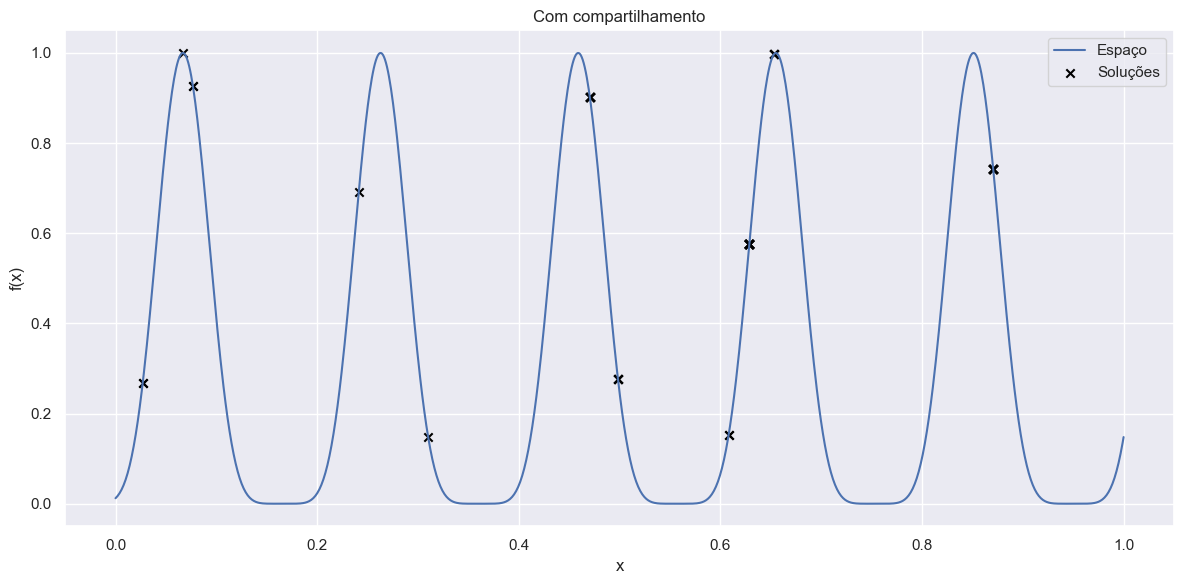

In [25]:
show_results("Com compartilhamento", True)